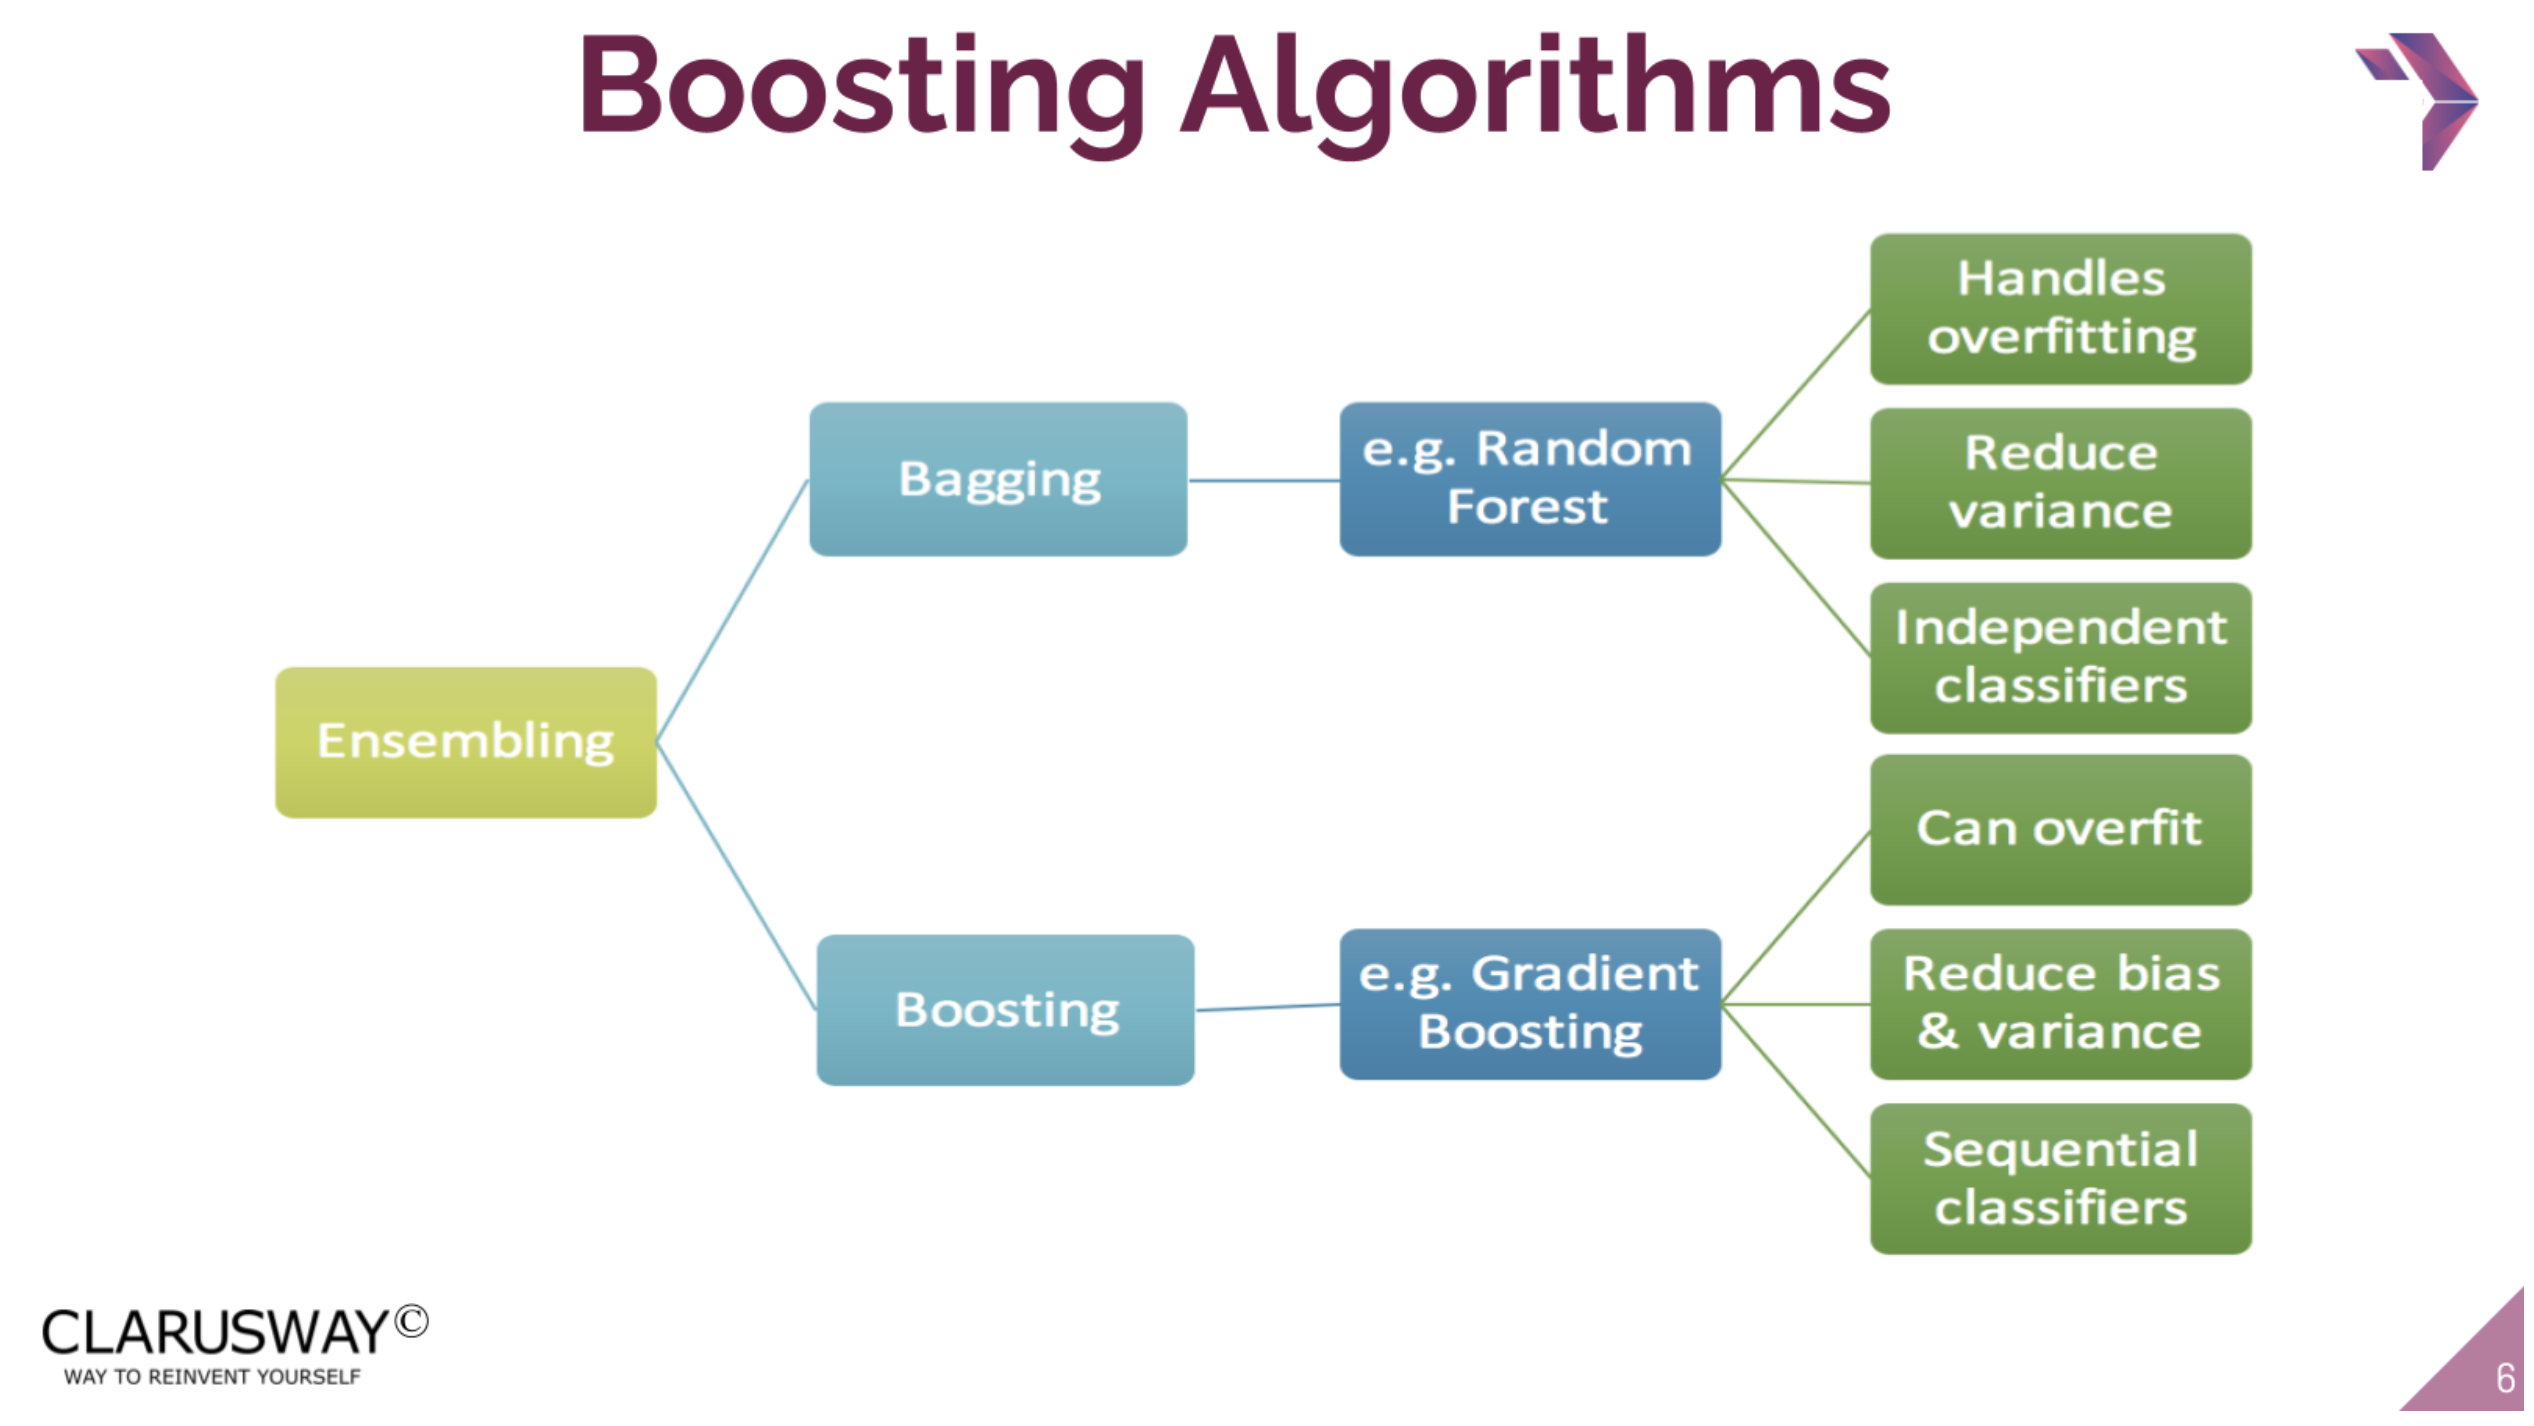

- Boostong overfit olabilir, cunku ayni data uzerinden calisiyor.
- soyle bir avantaji var hem bias hem variance dusurebiliyoruz.
- arka arkaya seri seklinde.

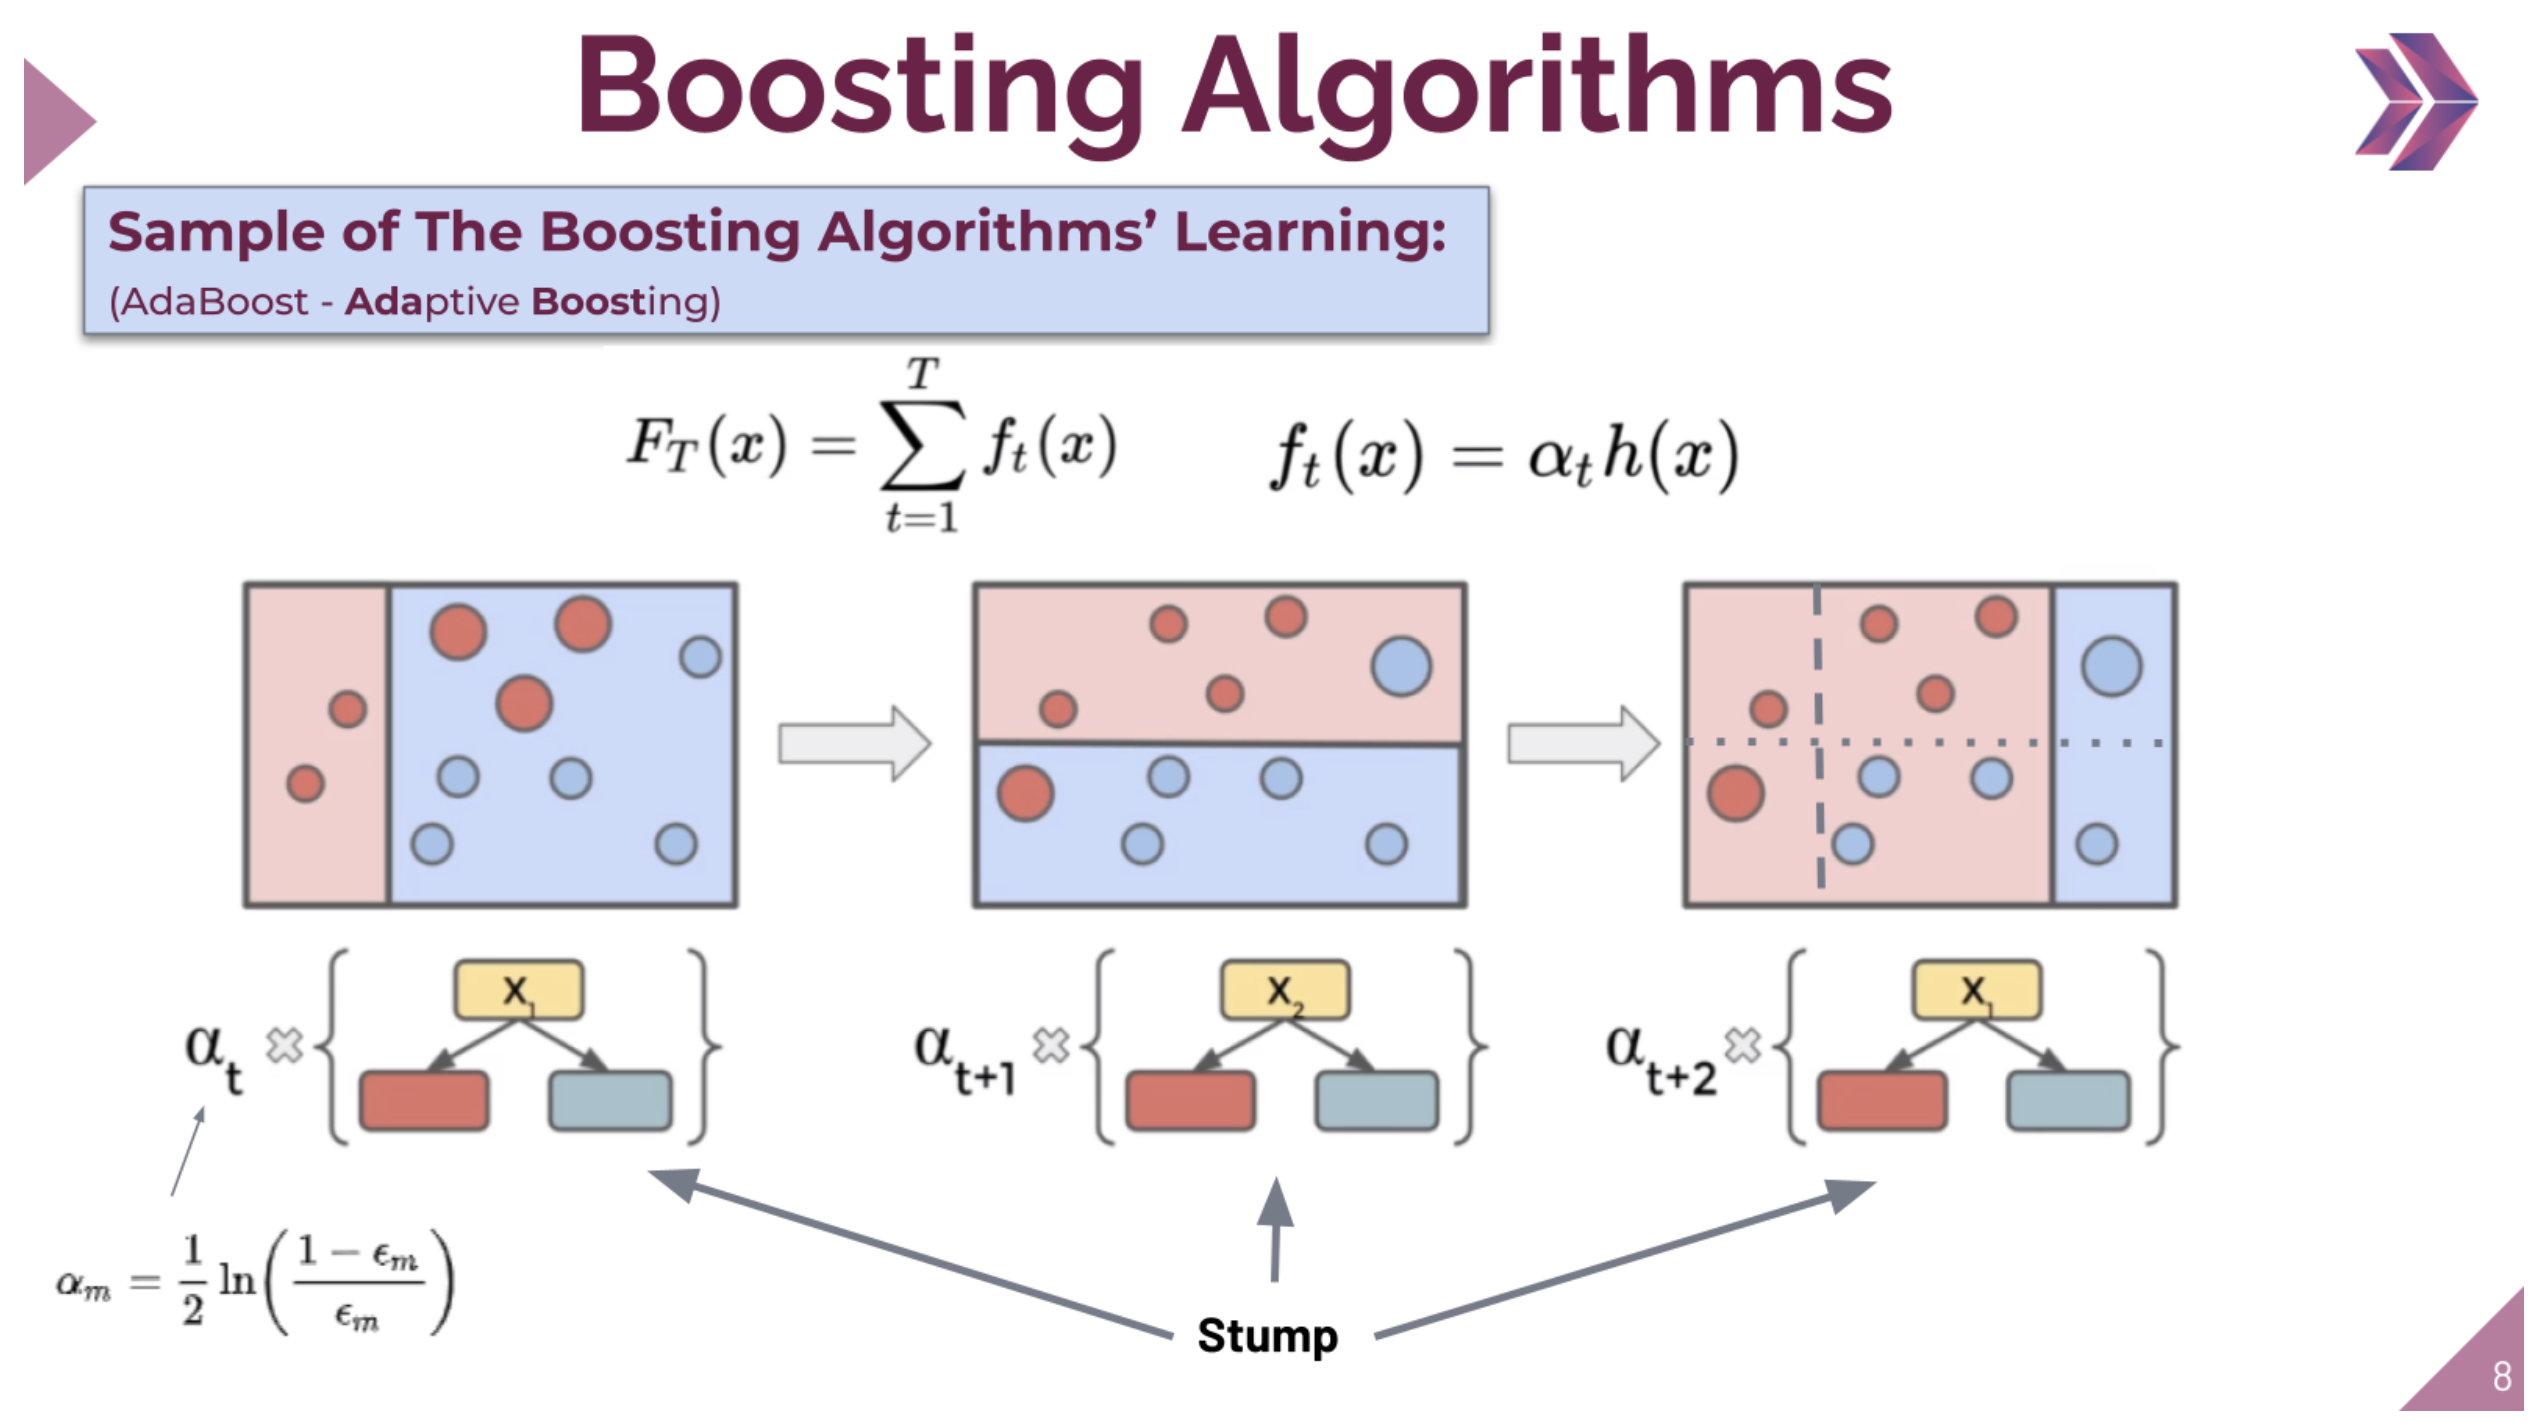

📊 Gradient Boosting’de öncelikli olarak ilk yaprak(initial leaf) oluşturulur. Sonrasında tahmin hataları göz önüne alınarak yeni ağaçlar oluşturulur. Bu durum karar verilen ağaç sayısına ya da modelden daha fazla gelişme kaydedilemeyinceye kadar devam eder.

🚀
Diyor ki;
xgboost, eksik değerlerin sağ node mu yoksa sol node mu gideceğine eğitim zamanında karar verir. Hangisinin kaybı en aza indireceğini seçer. Eğitim zamanında eksik değer yoksa, varsayılan olarak yeni eksikleri doğru node a gönderir.
Eksiklerinizin dağılımında signal varsa, bu esasen modele uygundur.
Puanlama verilerinizin eksik değerleri train verilerinizden farklı şekilde dağıtılmışsa dikkatli olun. xgboost'un missing handle etmesi uygundur ancak masking e karşı koruma sağlamaz.

## Adaboosting, Gradient Boosting, XGBoost

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


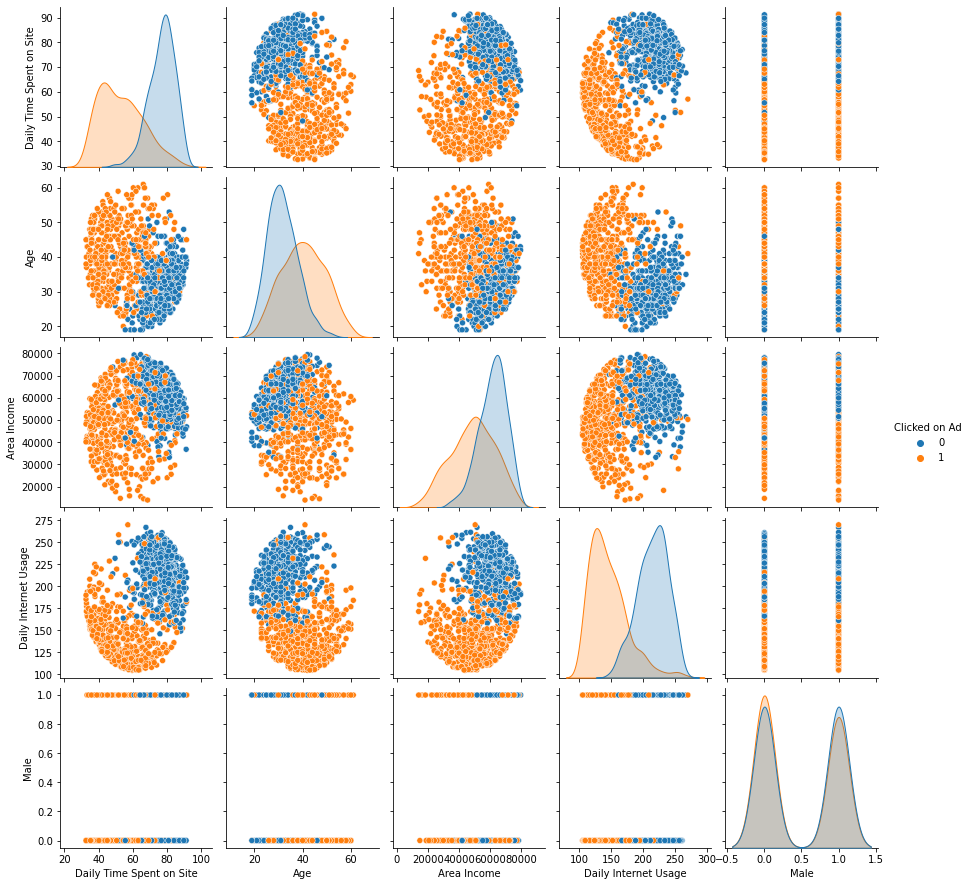

In [5]:
sns.pairplot(df, hue='Clicked on Ad')

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Model Performance

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [16]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [17]:
model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [20]:
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [21]:
from sklearn.tree import plot_tree

In [22]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [23]:
# targets = df["Clicked on Ad"].astype("str")

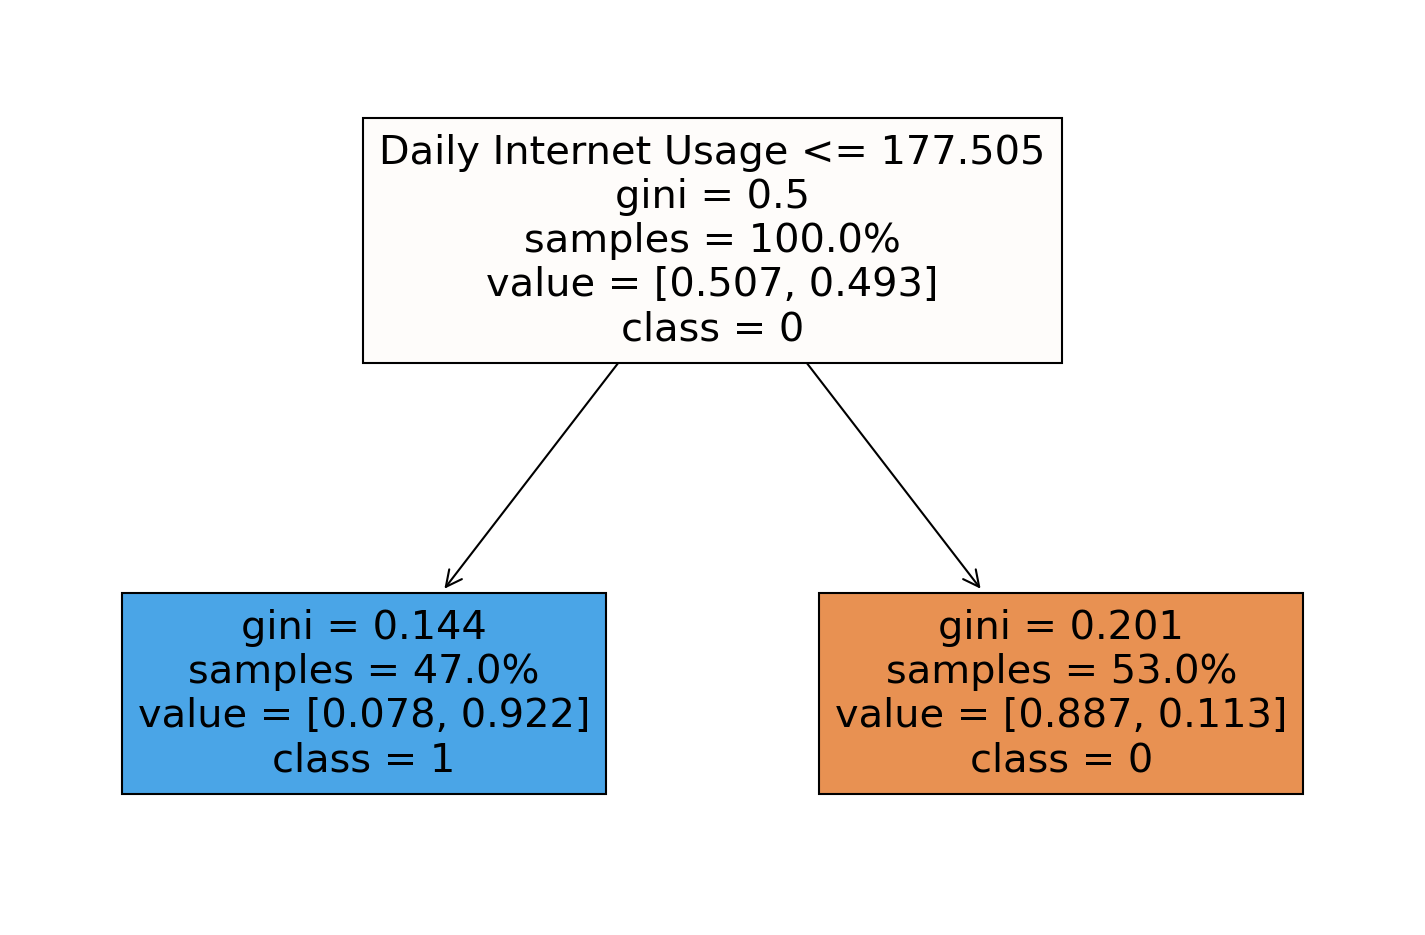

In [24]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique(), proportion=True);

📍ADABOOSTING BIR SONRAKI AGACA DOGRU TAHMIN EDILSIN DIYE yanlis tahmin edilen gozlemleri bir sonraki agacta arttiriyor.ayni gozlemler arttigi icin gini degeri duser. 

bunun sebebi o gozlemi ayni dala getirip , o dalin ginisini dusurmek,ginisi dusunce modelimizde dusuk ginili yapraklar secmeye calistigi icin o benim feature sayisini arttirdigim gozlemi yanlis secme ihtimali dusuyor.bir sonraki agacta onu dogru seciyor , neden? cunku ben onun feature sayisini arttirdim, feature sayisini arttirdim ne demek? eger onlar ayni yaprakta bir araya gelirlerse ginileri dusecek ,modelimde bu durumu aradigi icin dogal olarak benim skorum dusecek ve dusuk gininin oldugu yaprakta benim bir onceki agacta yanlis siniflandirilan gozlemim dogru siniflandirilmis olacak.   

- Adaboos ilk  agaci secerken ilk datasetimdeki butun featurelari teker teker sorular soruyor en iyi ayrimi hangi feature yaparsa o feature ilk sorum yapiyor. 
- tek bir soruyla en iyi ayrimi hangi feature yapiyorsam o en guclu featuredir.onu ilk agac yapiyorum.

- random foreste 1., 2. ve 3. agacta cikan sonuclari classlara gore sayiyor en cok olan classa atiyordu.
- adaboosta, agaclarin agirligini hesapliyor👇🏻tum olusan agaclardaki cikan classlarin sayilarini buluyor, ayni olan agaclarin agirliklarini toplayip digeri ile kiyasliyor hangisi daha buyukse ona gore siniflandiriyor.

In [25]:
model.estimator_errors_

array([0.09666667, 0.15660636, 0.29526371])

In [26]:
1/2*np.log((1-0.09666667)/0.09666667) 

1.117411476360216

In [27]:
1/2*np.log((1-0.15660636)/0.15660636) 

0.8418492023096668

In [28]:
1/2*np.log((1-0.29526371)/0.29526371) 

0.43497739343711583

## Analyzing performance as more weak learners are added.

📌 learning_rate parametresi;
 
- bir sonraki agaca yanlis tahmin edilen agaci observation sayisini ne kadar artiracagini/azaltilacagini  soyluyor.1 olursa bir sonraki agacta o yanlis tahmin edilen agaci daha fazla arttiriyor. belki 10 tane ornek yapiyor.fakat o 0.1 olursa 2 yada 3 ornek arttiriyor.1 dememiz yani o yanlis tahmin edilmis gozlem ile agresif bir sekilde mucadele et ,yani hemen 5 10 agacta tahmin etmeye basliyacak demek.bu degerim ne kadar buyuk olursa bir sonraki agaclarda onun sayisini cok daha fazla arttiracagi icin hemen dogru tahmnin etmeye basliyacak ama bu benim istedigim bir sey degil, ovetfite goturur..  
 
- olayisiyla benim learning_rate ile agac sayisi arasinda bir trade-off var.mumkun olduugnca kucuk learning_make, buyuk agac sayisi!
 
- biraz daha soft gitmem gerekiyor.sen bunu 5 -10 agacta bilmede  100 agacta bil niye? benim daha soft olsun, daha optime olsu, cunku ben hemen dogru tahmin etmesini istemiyorum overfit riskinden dolayi..
 
-  adaboost en buyuk handikaplarindan biriside bu decesion tree gibi boosting temelli adaboosta ovetfite cok yatkin.
 
-  o yuzden bu trade-off iyi kurmam lazim! 

In [29]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

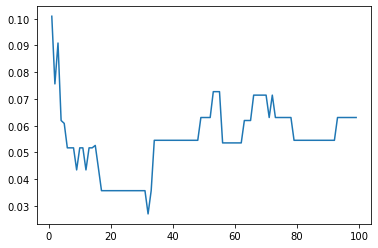

In [30]:
plt.plot(range(1,100), error_rates)

⁉️

her estimator sayisina gore aldigim hata oranlarina baktim. (f1-scora gore)
- normalde ideali decesion tree modellerde 100 agacta yada daha buyuk agaclarda optimum skora ulasmaktir.
- 👆 ana burada learning_rate= 1 oldugu icin hemen 20lerde 30 larda en dusuk hatayi yakalamis.
- bu benim istemedigim birsey.overfite goturebilir.dengeyi iyi saglamam lazim
- agac sayisi learning_rate dengeli olmali, agac sayim ne kadar fazla ise learning_rate o kadar duser.
- o yuzden gridsearchde bunlari deneyecegiz, learning_rate azaltip, agac sayisini yukseltecegiz.

In [31]:
model.feature_importances_

array([0.24242424, 0.15151515, 0.25252525, 0.35353535, 0.        ])

In [32]:
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.242424
Age,0.151515
Area Income,0.252525
Daily Internet Usage,0.353535
Male,0.000000


In [33]:
imp_feats = feats.sort_values("Importance")

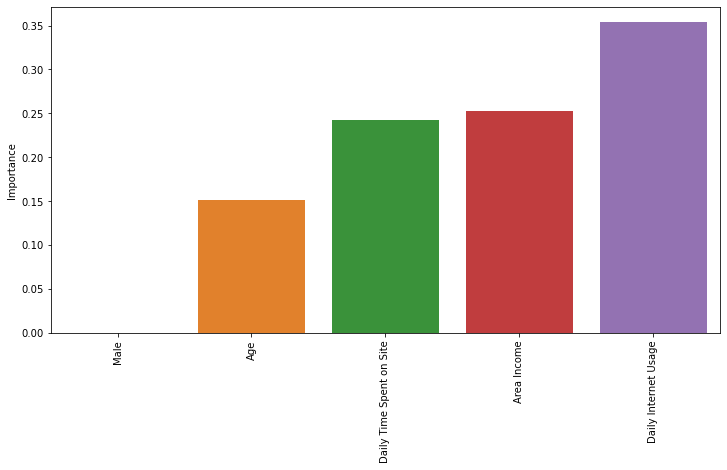

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

🔍

en kuvvetli featurem  'daily internet usage' olmus ama hemen hemen hepsinin ayni derece tahmonlemeye etkisi var.

## Gridsearch

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
model = AdaBoostClassifier(random_state=42)

In [37]:
param_grid = {"n_estimators": [17, 20, 100, 500], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [38]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [39]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [17, 20, 100, 500]},
             scoring='f1')

In [40]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

👆bakin burda hemen o trade-off kurmus defaultu 50 olan n_estimatoru 100 cikarirken default 1 olan learning_rate 0.1 dusurmus!

In [41]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [42]:
y_pred = ada_grid_model.predict(X_test)

In [43]:
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [45]:
y_train_pred = ada_grid_model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



✍🏻


- yukardaki degerlerim arasinda cok bir fark olusmadi ama sunu biliyorum ki beni overfite goturecek learning_rate ile estimator sayimi dengelemis oldum.
- overfit ihtimalini dusurdum.
- gridsearch skorlarimi cok iyilestirmedi ama gridsearch underfit/overfit sorunlarini cozer.en iyi parametreleri bularak.

- birde eger skorlar zaten iyiyse 90 ustu gibi gridsearch ciddi bir iyilestirme saglamaz!

## Evaluating ROC Curves and AUC

In [46]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

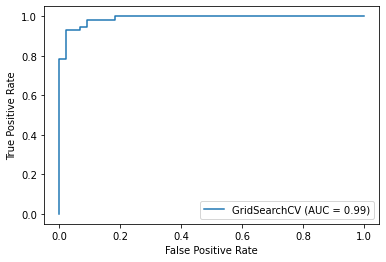

In [47]:
plot_roc_curve(ada_grid_model, X_test, y_test)

-  modelimizin daha genel gorunumune bakmak icin roca bakiyorduk
-  performans 0.99, mukemmele yakin
-  ozellikle bu skorlar hastalik skorlarinda kullanilir.

## Cross Validate

In [50]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.185508,0.034434,0.944444,0.934783,0.955556,0.945055,0.972346
2,0.158325,0.031240,0.977778,1.000000,0.955556,0.977273,0.980741
3,0.156289,0.031252,0.977778,1.000000,0.955556,0.977273,0.996543
4,0.171872,0.031254,0.988889,0.978261,1.000000,0.989011,1.000000
5,0.156248,0.031252,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.197848,0.031251,0.955556,0.934783,0.977273,0.955556,0.992836
7,0.169260,0.031250,0.922222,0.951220,0.886364,0.917647,0.974061
8,0.171914,0.031252,0.966667,1.000000,0.931818,0.964706,0.986166
9,0.182401,0.031244,0.977778,1.000000,0.954545,0.976744,0.991107
10,0.156289,0.031255,0.966667,0.955556,0.977273,0.966292,0.990119


In [51]:
df_scores.mean()[2:]

test_accuracy     0.967778
test_precision    0.975460
test_recall       0.959394
test_f1           0.966956
test_roc_auc      0.988392
dtype: float64

-   hem cv skorlarimin, hem train test skorlarinin tutarli oldugu gorunuyor!

## Gradient Boosting Modelling and Model Performance

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
model = GradientBoostingClassifier(random_state=42)

In [54]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [56]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [57]:
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



📍
- iyi skorlarda ben modelim dengelimi overfite karsi direncli mi ona bakiyorum.
- soru isareti oldugunda gridsearch basvur

In [58]:
model.feature_importances_

array([2.07472544e-01, 2.71306001e-02, 5.22078111e-02, 7.12911699e-01,
       2.77345392e-04])

In [59]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.207473
Age,0.027131
Area Income,0.052208
Daily Internet Usage,0.712912
Male,0.000277


In [60]:
imp_feats = feats.sort_values("Importance")

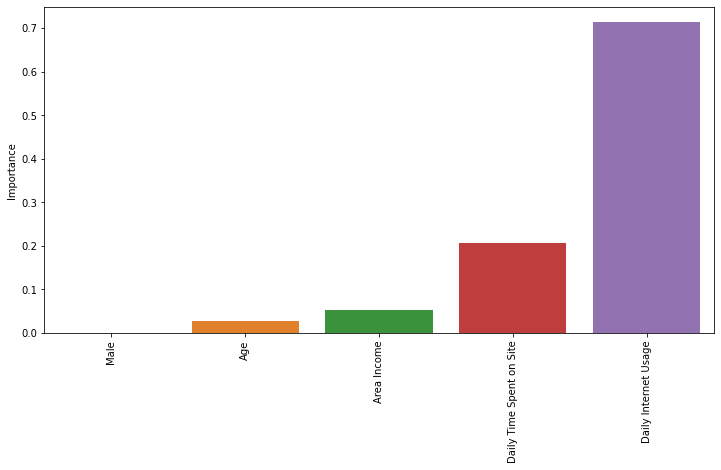

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

📌📌📌
-feature selection SECIMINDE; 
- bagging methodlarinda Random Forest
- boosting methodlarda XGBOOST FEATURE IMPORTANCE gonul rahatligi ile kullanabilirz.

📍gradient boosting; arkasinda hem gradien descent hem boosting algoritmalarini birlestir mis.
- sapmayi (deviance) minimize etmeye calisir
- aslinda arkasinda tahminleme yaparken
- hatirlarsak logistic reg gradien descent tabanlidir.logistic regression algoritmasi calisir.
- reg butun fiyatlarin ort aliyor ve tum gozlemlerin o ortalamayi veriyor.sonra o ortalama fiyattan  butun gozlemlerin gercek fiyatlarini cikarip residual olusturuyor. 
-  sonrada tum o residuallari kendi gercek fiyatina yakinlastirmaya calisiyor.
- yani residuallari 0 a yaklastirmaya calisiyorki gercek degerlerine yakin tahminlerde bulunabilsin.



📍classificationdaki calisma mantigi ne?;

- arkaplanda; benim ilk belirledigim  oran , logistic regression sokacagim bir oran ile basliyor.
- mesela burda tahminlerim 0 ve 1. tikladi tiklamadi.
- (tikladiklarin tiklamayanlara orani) sonra bunu aliyor logistic reg formulume yaziyor(yani brda aldigim skoru bu formul ile olasiliga ceviriyor.)

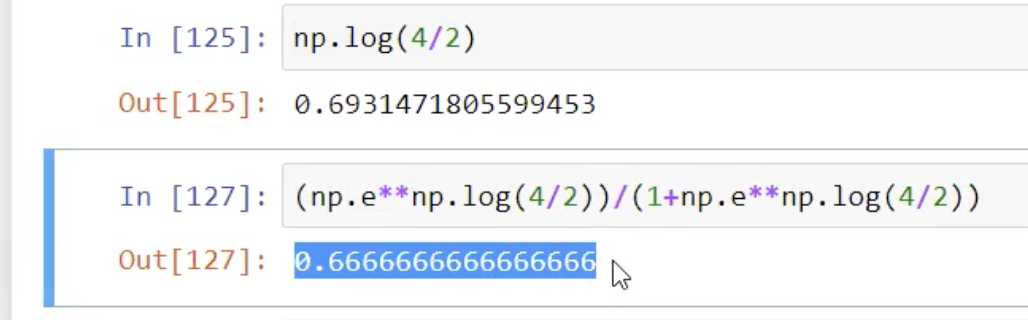


- regressionda ilk belirledigim residual nasildi.labelimdaki butun fiyat bilgilerini ortalamasiydi.sonra arttirarak azaltarak gercek fiyata yaklastirmaya calisiyordu.
- burada ilk belirledigi residual nasil buluyor ona bakiypruz.yukardaki islem ile
- ilk residual degerimi aliyor  0 dan bu degeri cikariyor, 1 den bu degeri ciksriyor, sonra bunlar benim residual artiklarim oluyor.sonra bu olasiliklarin 1 tanesini 0 a bir tanesini 1 e yaklastirmaya calisiyor.yani ne yapiyor ? 0 larin 0 olma olasiligini 1 lerin 1 olma olasiligini arttirmaya calisiyor.

📍📍📍

gradient boosting classifaer bir classification islemi yaparken ile ilk residual nasil belirliyor?
- oncelikle cogunlugun azinliga oranini aliyorum.
- logarirmasini aliyroum
- log sonucu aldigim degerleri logistic red deki olasiligini hesapliyorum
- bu degr ilk residual degerim oluyor
- bu degere istinaden  1ler icin 1e 0 icin 0 a cekmeye calisiyorum.


- loss=deviance iste yukarida ypilan islem, logistic reg yapiyor, residual minimize etmeye calisiyor.
- learning_rate= 0.1 default kendinden optimize etmis.adaboosta gore.adaboosta  1 di
- n_estimators= 50 den 100 cikarmis, gradient boosting overfite karsi guclu, agac sayisini artirmakta cekiunme
- subsample= benim her dallanmada elimdeki gozlemlerin ne kadarinin kullaniyor.0.8 ve 0.5  gridsearchde denemekte fayda var.
- criterion='friedman_mse' defaultuna dokunma!
- min_samples_split= bir yapragin bolunmesi icin gereken min gozlem sayisi
- min_samples_leaf= bir yapragin yaprak olarak kabul edilmesi icin gereken gozlem sayisi
- max_depth=3 e cekmisler, agac adaboosta 1 cok zayif olarak dusunup 3 yapmislar.zaten adaboosting hatalari uzerine cikmis gradientboosting.

- learning_rate
- n_estimators
- subsample
- min_samples_split
- min_samples_leaf
- max_depth
- max_feature

👆bunlarlar oynayabiliriz.

## Gridsearch

In [62]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [63]:
gb_model = GradientBoostingClassifier(random_state=42)

In [64]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.5s finished


In [65]:
grid.best_estimator_

GradientBoostingClassifier(max_features=3, random_state=42, subsample=0.5)

In [66]:
y_pred = grid.predict(X_test)

In [67]:
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [68]:
y_train_pred = grid.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  4 440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.99      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Evaluating ROC Curves and AUC

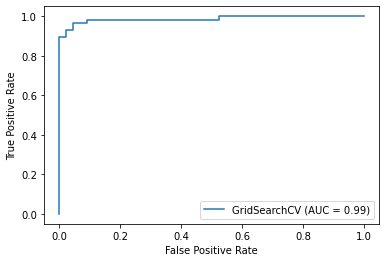

In [69]:
plot_roc_curve(grid, X_test, y_test);

## Cross Valudate

In [70]:
model = GradientBoostingClassifier(n_estimators=300, random_state=42, subsample=0.5, 
                                   max_features =2)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.245728,0.015806,0.922222,0.931818,0.911111,0.921348,0.963457
2,0.233991,0.015638,0.977778,1.000000,0.955556,0.977273,0.985185
3,0.234361,0.000000,0.977778,1.000000,0.955556,0.977273,0.998025
4,0.234367,0.000000,0.955556,0.955556,0.955556,0.955556,0.998025
5,0.293378,0.008000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.240051,0.000000,0.944444,0.914894,0.977273,0.945055,0.988636
7,0.249794,0.000000,0.933333,0.975000,0.886364,0.928571,0.958498
8,0.234381,0.015630,0.966667,1.000000,0.931818,0.964706,0.993577
9,0.242930,0.000000,0.966667,0.955556,0.977273,0.966292,0.992095
10,0.249998,0.000000,0.977778,0.977273,0.977273,0.977273,0.991601


In [71]:
df_scores.mean()[2:]

test_accuracy     0.962222
test_precision    0.971010
test_recall       0.952778
test_f1           0.961335
test_roc_auc      0.986910
dtype: float64

## XG Boosting Modelling and Model Performance

- butun modellerin artilarini tek bir modelde toplamislar!
- gradient boosting ile ayni mantikta calisiyor ama daha hizli egitim, birde feature selection icin cok iyi degildir gradient boostingde.

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

- booster= 'gbtree' --> tree base metodlari kullaniyor, dokunmamak gerekir.
- logistic mantigi ile calisir.
- min_child_weight --> eger modelde ovetfit durumu varsa bu rakami 0.8, 0.5 arasi deneyip duzeltip duzeltilmedine bakilabilir.
- gamma --> regurazazion parametresidir.0 ile sonsuz arasinda deger alir,siniri yok genellikle kaggle yarismalarinda sabahtan aksama denen bir parametre

In [74]:
y_pred = xgb.predict(X_test)

In [75]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.93      0.96      0.95        56

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [76]:
y_train_pred = xgb.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[454   2]
 [  7 437]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [77]:
xgb.feature_importances_

array([0.22119784, 0.06840972, 0.06324281, 0.63293296, 0.0142167 ],
      dtype=float32)

In [78]:
feats = pd.DataFrame(index=X.columns,data=xgb.feature_importances_,columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.221198
Age,0.068410
Area Income,0.063243
Daily Internet Usage,0.632933
Male,0.014217


In [79]:
imp_feats = feats.sort_values("Importance")

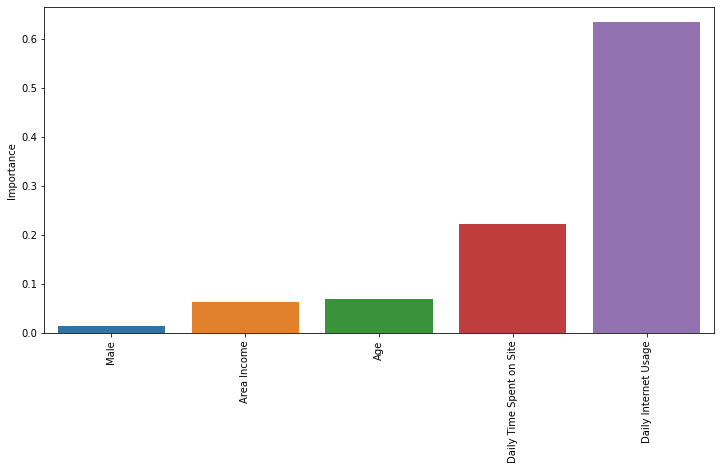

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

## Gridsearch

In [81]:
param_grid = {"n_estimators":[100, 300],'max_depth':[3,5,6], "learning_rate": [0.1, 0.3],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

degisiklik siran: n_estimator, sonra max_depth, sonra subsample

In [82]:
xgb_model = XGBClassifier(random_state=42)

In [83]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    8.3s finished


In [84]:
xgb_grid.best_estimator_

XGBClassifier(colsample_bytree=0.5, random_state=42)

In [85]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [86]:
y_pred = xgb_grid.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [88]:
y_train_pred = xgb_grid.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[453   3]
 [ 13 431]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       456
           1       0.99      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Evaluating ROC Curves and AUC

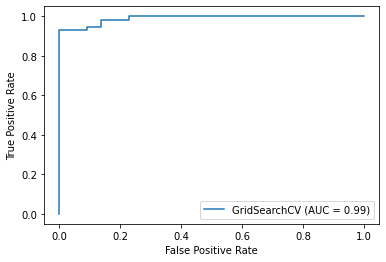

In [89]:
plot_roc_curve(xgb_grid, X_test, y_test);

## Cross Validate

In [90]:
model = XGBClassifier(n_estimators=300, random_state=42, subsample=1, learning_rate= 0.1, colsample_bytree=0.5,
                                  max_dept=6)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.195195,0.016748,0.944444,0.934783,0.955556,0.945055,0.977778
2,0.192311,0.000000,0.977778,1.000000,0.955556,0.977273,0.984691
3,0.205296,0.000000,0.977778,1.000000,0.955556,0.977273,0.992593
4,0.187500,0.015633,0.988889,0.978261,1.000000,0.989011,1.000000
5,0.203319,0.007010,0.988889,0.977778,1.000000,0.988764,1.000000
6,0.218070,0.000000,0.933333,0.895833,0.977273,0.934783,0.987154
7,0.190209,0.015627,0.944444,0.975610,0.909091,0.941176,0.972826
8,0.187523,0.015642,0.955556,1.000000,0.909091,0.952381,0.993083
9,0.187483,0.000000,0.988889,1.000000,0.977273,0.988506,0.998024
10,0.188875,0.015638,0.966667,0.955556,0.977273,0.966292,0.993577


In [91]:
df_scores.mean()[2:]

test_accuracy     0.966667
test_precision    0.971782
test_recall       0.961667
test_f1           0.966051
test_roc_auc      0.989973
dtype: float64

## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



## Logistic Regression

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [96]:
scaler = MinMaxScaler()

In [97]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## SVM

In [101]:
from sklearn.svm import SVC

In [102]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## Comparing Models

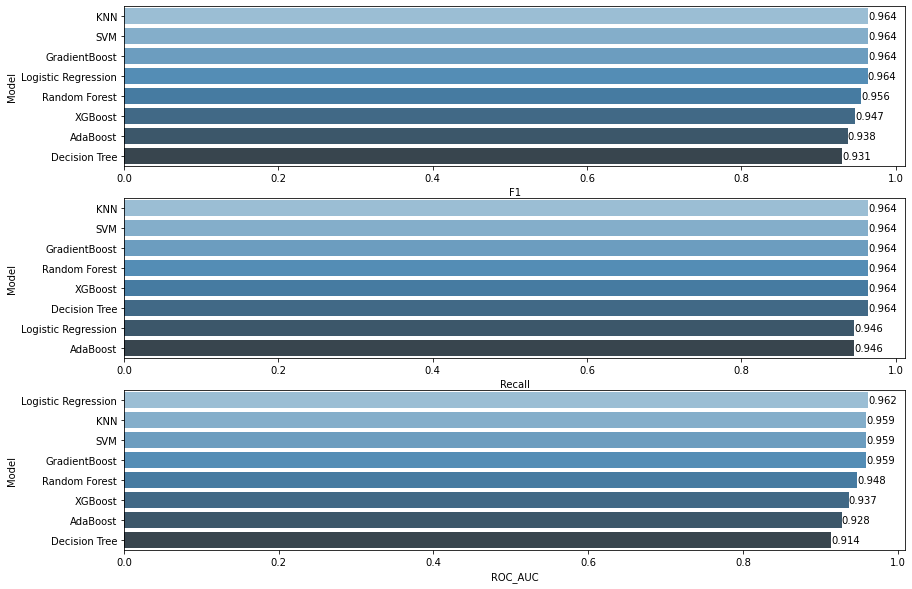

In [103]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()